In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Laden des Datensatzes
data = pd.read_csv('../data/GeneralDatensatz18-21ohneGeo.csv', sep=';')

In [3]:
# Annahme: UKATEGORIE ist die Zielvariable und alle anderen Merkmale sind Prädiktoren
target = 'UKATEGORIE'
features = ['USTUNDE', 'UMONAT', 'UWOCHENTAG', 'BEZ', 'UTYP1', 'UJAHR']

In [4]:
X = data[features]
y = (data[target] == 1).astype(int)

In [5]:
# Codieren der kategorischen Merkmale
X = pd.get_dummies(X, columns=features)

In [6]:
# Trainieren des Modells
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)


RandomForestClassifier(random_state=42)

In [7]:
# Extrahieren der Feature-Importanzen
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

In [8]:
# Aggregieren der Importanzen nach den ursprünglichen Merkmalen
feature_importance_df['OriginalFeature'] = feature_importance_df['Feature'].apply(lambda x: x.split('_')[0])
category_importance = feature_importance_df.groupby('OriginalFeature').sum().reset_index()

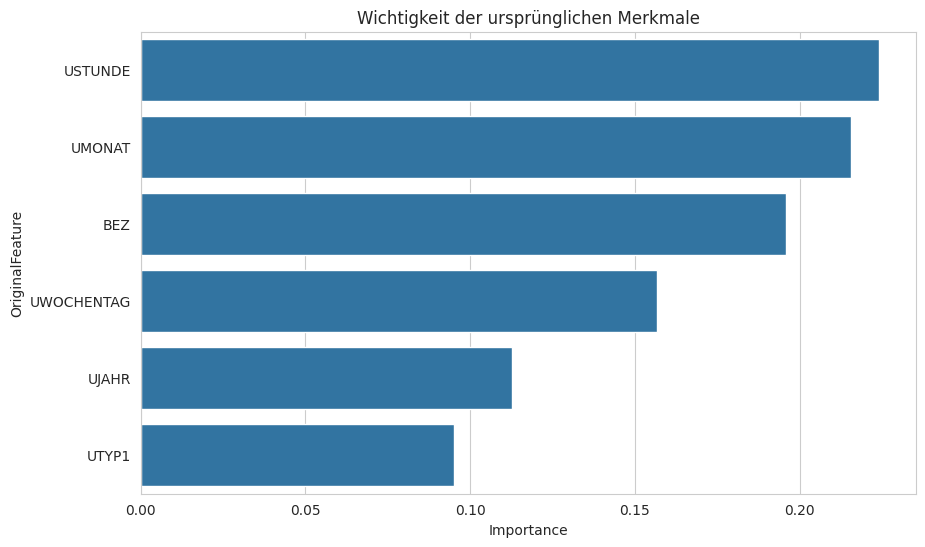

In [9]:
# Plotten der Feature-Importanzen
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='OriginalFeature', data=category_importance.sort_values(by='Importance', ascending=False))
plt.title('Wichtigkeit der ursprünglichen Merkmale')
plt.show()

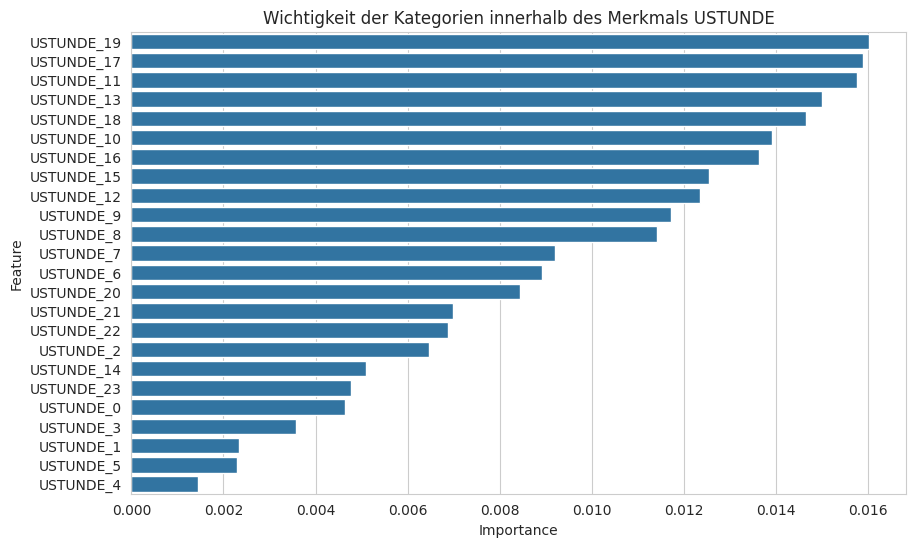

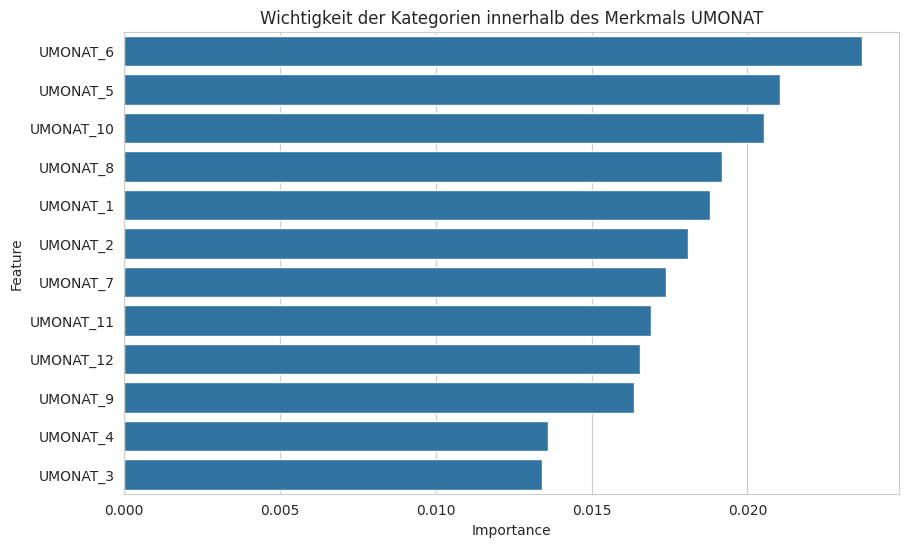

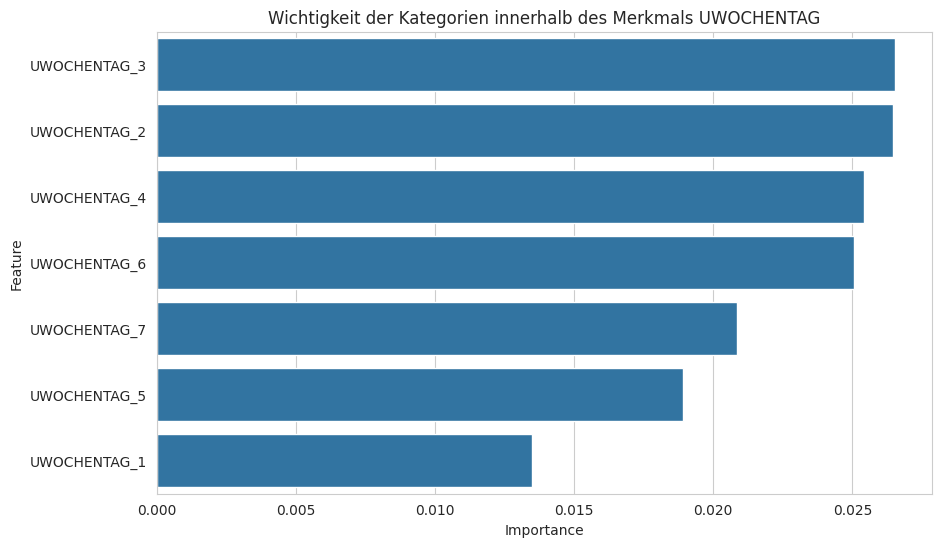

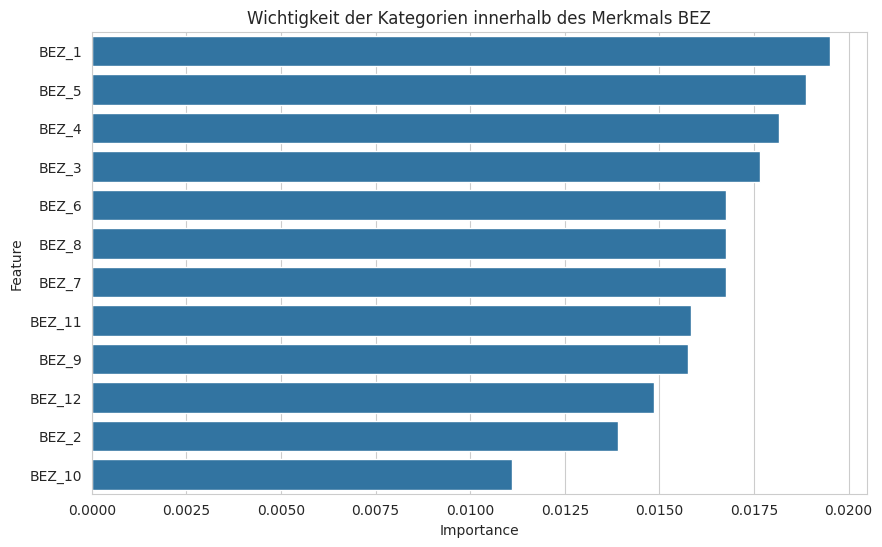

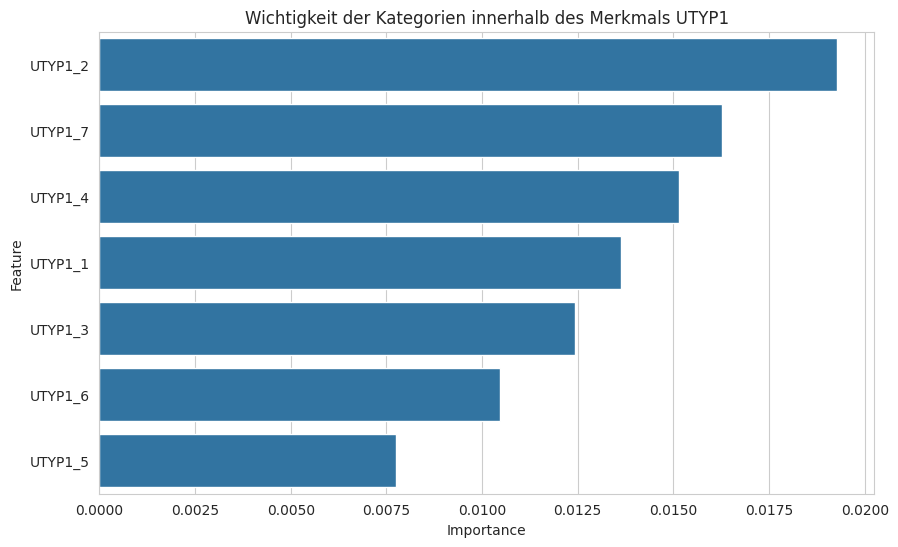

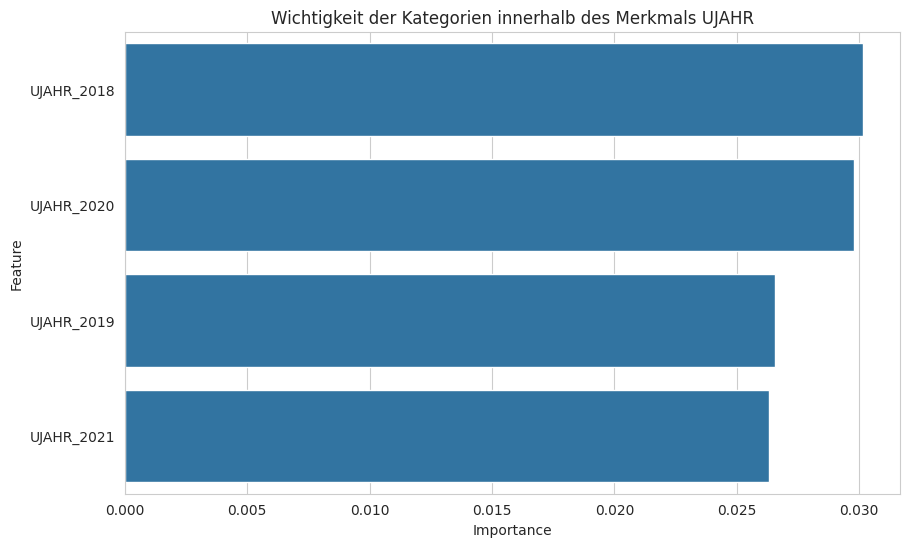

In [10]:
# Plotten der wichtigsten Kategorien innerhalb der Merkmale
for feature in features:
    subset = feature_importance_df[feature_importance_df['OriginalFeature'] == feature]
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=subset.sort_values(by='Importance', ascending=False))
    plt.title(f'Wichtigkeit der Kategorien innerhalb des Merkmals {feature}')
    plt.show()